In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

import sweetviz as sv
import pandas_profiling as pp

from sklearn import metrics
from sklearn import model_selection

from tqdm.notebook import tqdm

In [2]:
train = pd.read_csv('input/Train.csv', parse_dates=['date'])
test = pd.read_csv('input/Test.csv', parse_dates=['date'])

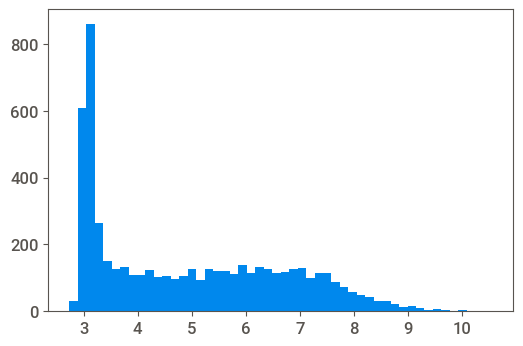

In [20]:
plt.hist(train.time_spent, bins=50);

In [4]:
train.time_spent = np.log1p(train.time_spent)

In [5]:
pp_report = train.profile_report(title='Train')
sv_report = sv.analyze(train, target_feat='time_spent')

                                             |          | [  0%]   00:00 -> (? left)

In [6]:
sv_report.show_html('Train_sv.html')

Report Train_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
pp_report.to_file('Train_pp.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

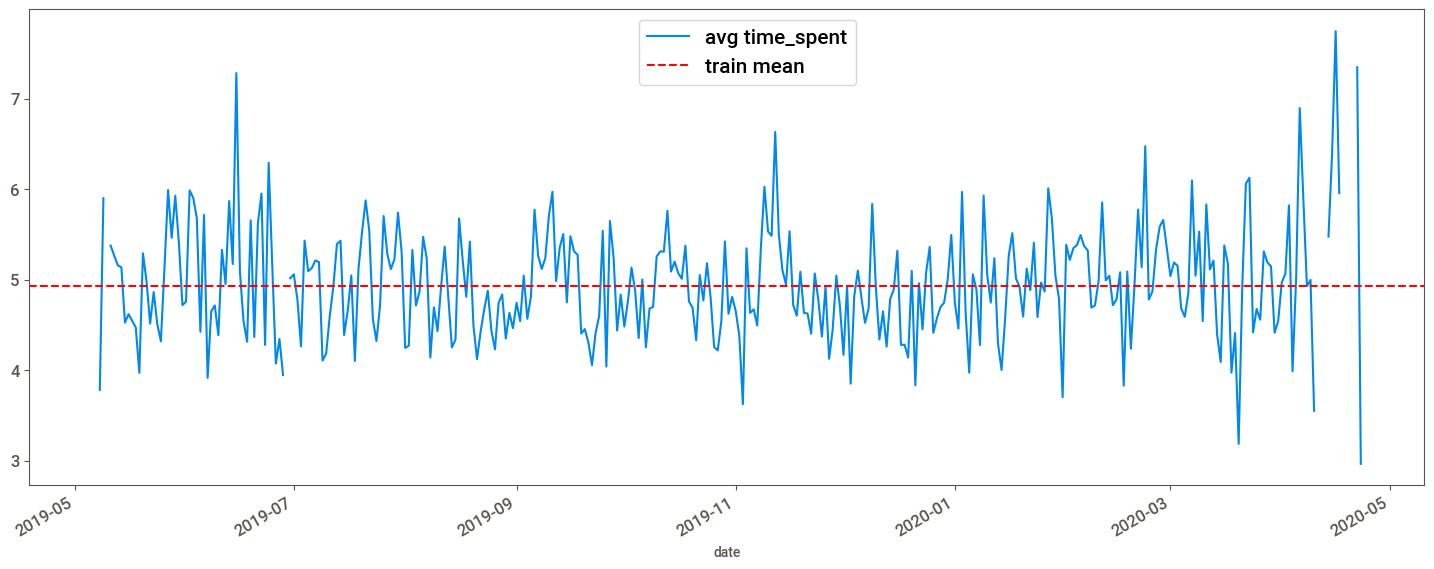

In [21]:
D = pd.concat([train, test])

D.groupby('date').time_spent.mean().plot(figsize=(18,7), label='avg time_spent')
plt.axhline(D.time_spent.mean(), c='red', linestyle='dashed', label='train mean')
plt.legend(fontsize=15, bbox_to_anchor=[0.6, 1]);

In [9]:
tmp = D.groupby('date')[['time_spent']].mean()
tmp[tmp.time_spent.isnull()]

,time_spent
date,
2019-05-05,NaN
2019-05-07,NaN
2019-05-10,NaN
2019-06-29,NaN
2020-04-11,NaN
2020-04-13,NaN
2020-04-19,NaN


In [10]:
# determine test size
D.time_spent.isnull().sum()/D.shape[0]

0.30002578648788036

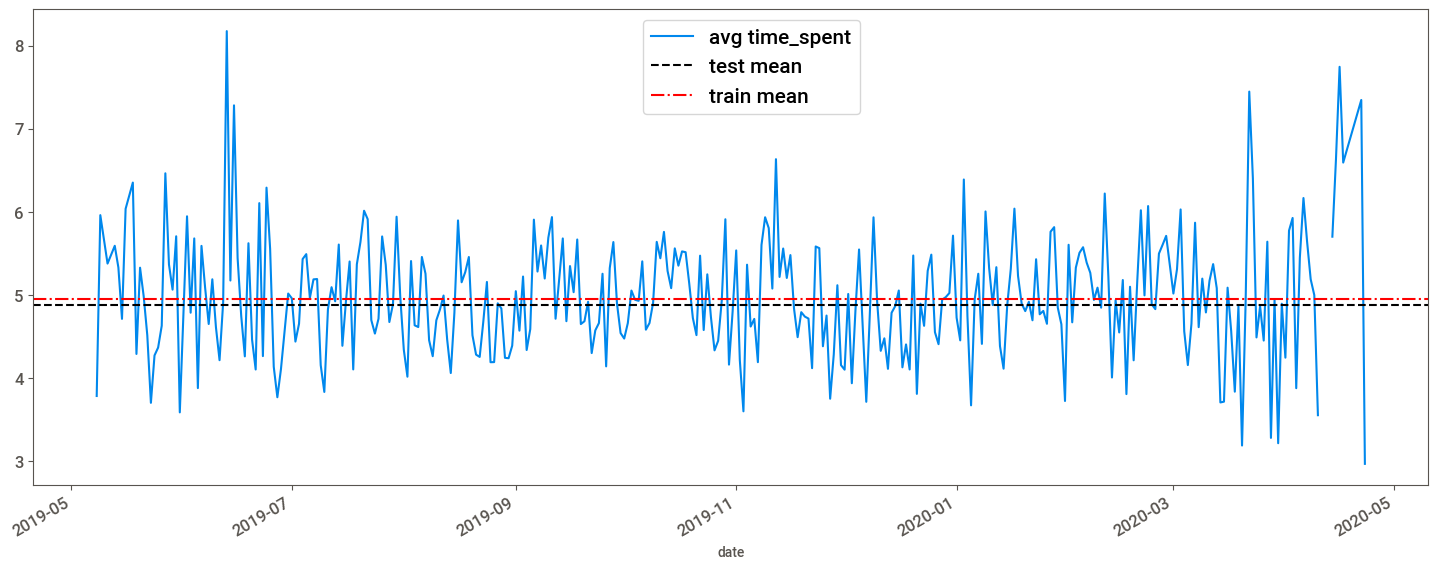

In [22]:
trn, tst, y_trn, y_tst = model_selection.train_test_split(train, train.time_spent, test_size=0.3, random_state=23)
data = pd.concat([trn, tst.drop('time_spent', axis=1)])

data.groupby('date').time_spent.mean().plot(figsize=(18,7), label='avg time_spent')
plt.axhline(tst.time_spent.mean(), c='black', linestyle='dashed', label='test mean')
plt.axhline(trn.time_spent.mean(), c='red', linestyle='-.', label='train mean')
plt.legend(fontsize=15, bbox_to_anchor=[0.6, 1]);

In [14]:
def mh_metric(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))


mh_metric(y_tst, pd.Series([y_trn.mean()] * len(y_tst)))

1.7677127847006844

In [17]:
submission = pd.read_csv('subs/SampleSubmission.csv')
submission.time_spent = np.expm1(train.time_spent.mean())

In [18]:
submission

,time_spent
0,137.196002
1,137.196002
2,137.196002
3,137.196002
4,137.196002
...,...
2322,137.196002
2323,137.196002
2324,137.196002
2325,137.196002


In [165]:
submission.to_csv('subs/log_mean_subs.csv', index=False)